In [1]:
#介绍:使用Hyperopt进行贝叶斯优化，将通过使用Hyperopt来查找函数的最小值来浏览基于贝叶斯模型的优化的基础知识。
#随后使用这些强大的方法来解决许多问题，包括机器学习模型的超参数优化。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#基于贝叶斯模型的优化问题有四个部分:目标函数:我们想要最小化的。域空间:使目标最小化的参数值。
#超参数优化函数:构造代理函数并选择下一个值进行计算。试验:每次评估目标函数时，记录参数对评估
#目标函数是优化中代价高昂的部分，基于顺序模型的优化(SMBO)方法是贝叶斯优化的形式化形式，它按
#顺序更新概率模型:对目标函数的每次评估都使用一组值来更新模型，并认为最终模型将代表真正的目标
#函数。这是贝叶斯推理的一个应用。该算法形成了目标函数的初始思想，并通过每一个新的证据对其进
#行更新。在目标函数中尝试的下一个值是由选择概率模型(代理函数)的算法选择的，通常有一个被称为
#预期改进的标准。在代理函数中找到能够产生最大预期改进的值要比评估目标函数本身便宜得多。通过
#基于模型而不是随机选择下一个值，希望这个算法能更快地收敛到真正的最佳值。总体目标是通过多花
#一点时间来选择下一个值，从而更少地评估目标函数。总体而言，贝叶斯优化和SMBO方法:
#      与随机搜索相比，目标函数收敛到较低的分数要找到目标函数的最优值所需的时间要短得多因此，
#      我们得到了更快的优化和更好的结果。这是两个理想的结果，尤其是当我们使用机器学习模型的超参数调优时!
#使用树Parzen估计器基于顺序模型的优化SMBO方法在第3部分有所不同，第3部分是用于构建概率模型(也称为代理函数)的算法。
#代理函数有几个选项:高斯过程树形结构Parzen估计量随机森林回归Hyperopt实现了树结构Parzen估计器。
#这个算法的细节并不复杂，但是我们不会在这个笔记本中讨论它们(详细信息请参阅[本文])，
#我们不需要担心算法的实现，因为Hyperopt会为我们解决这个问题。我们只需要确保我们已经正确地定义了
#目标函数和要搜索的值域。然后，我们选择算法并让它运行。Hyperopt将自动跟踪过去的结果以通知模型(第4部分)，
#但是我们也可以使用自定义对象来获得关于优化过程的更多信息。Hyperopt是一个用于Bayesian优化的开源Python库，
#在本文中，我们将实现随机搜索(Hyperopt对此有一个方法)和树Parzen估计器(一种基于顺序模型的优化方法)。

def objective(x):
    """目标函数最小化"""    
    # 创建多项式对象
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])
    # 返回多项式的值
    return f(x) * 0.05

Minimum of -219.8012 occurs at 4.8779


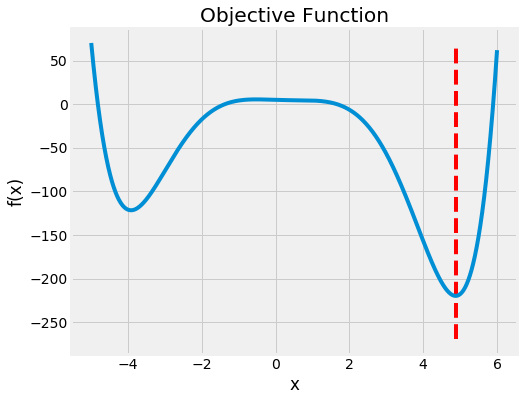

In [3]:
#对于目标函数，我们将使用一个简单的多项式函数来求最小值。这个函数在定义的范围内有一个全局极小值和一个局部极小值。
#当定义目标函数时，必须确保它返回一个实数数以使之最小化。

# Space over which to evluate the function is -5 to 6
x = np.linspace(-5, 6, 10000)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 50, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [5]:
from hyperopt import hp
# Create the domain space
space = hp.uniform('x', -5, 6)

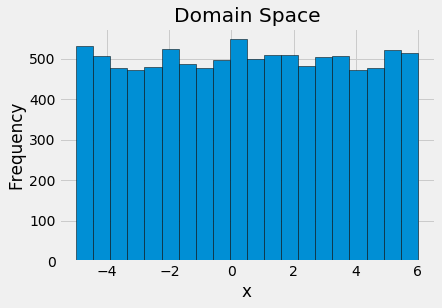

In [6]:
#定义域是x的值，我们对它求值。首先，我们可以在定义函数的空间上使用均匀分布。

from hyperopt.pyll.stochastic import sample
samples = []
# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))    

# Histogram of the values
plt.hist(samples, bins = 20, edgecolor = 'black'); 
plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space');

In [7]:
#算法将从该分布中抽取值，最初是在探索领域空间时随机抽取值，但随着时间的推移，它将“聚焦”于最有前途的值。
#因此，算法在最小函数值4.9附近应该有更多的值。我们可以将其与随机搜索进行比较，随机搜索应该从整个分布均匀地尝试值。

from hyperopt import rand, tpe

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

In [8]:
#Hyperparameter优化算法
#Hyperopt中的超参数优化算法有两种选择:随机和树Parzen估计量。我们可以使用两者并比较结果。

from hyperopt import Trials
# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

In [9]:
from hyperopt import fmin

# Run 2000 evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=2000, rstate= np.random.RandomState(50))

print(tpe_best)

# Run 2000 evals with the random algorithm
rand_best = fmin(fn=objective, space=space, algo=rand_algo, trials=rand_trials, 
                 max_evals=2000, rstate= np.random.RandomState(50))

{'x': 4.878481851906148}


In [10]:
# Print out information about losses
print('Minimum loss attained with TPE:    {:.4f}'.format(tpe_trials.best_trial['result']['loss']))
print('Minimum loss attained with random: {:.4f}'.format(rand_trials.best_trial['result']['loss']))
print('Actual minimum of f(x):            {:.4f}'.format(miny))

# Print out information about number of trials
print('\nNumber of trials needed to attain minimum with TPE:    {}'.format(tpe_trials.best_trial['misc']['idxs']['x'][0]))
print('Number of trials needed to attain minimum with random: {}'.format(rand_trials.best_trial['misc']['idxs']['x'][0]))

# Print out information about value of x
print('\nBest value of x from TPE:    {:.4f}'.format(tpe_best['x']))
print('Best value of x from random: {:.4f}'.format(rand_best['x']))
print('Actual best value of x:      {:.4f}'.format(minx))

Minimum loss attained with TPE:    -219.8012
Minimum loss attained with random: -219.8012
Actual minimum of f(x):            -219.8012

Number of trials needed to attain minimum with TPE:    655
Number of trials needed to attain minimum with random: 235

Best value of x from TPE:    4.8785
Best value of x from random: 4.8776
Actual best value of x:      4.8779


In [11]:
%%timeit -n 3
# Run 2000 evals with the tpe algorithm
best = fmin(fn=objective, space=space, algo=tpe_algo, max_evals=200)

864 ms ± 16.6 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [12]:
%%timeit -n 3

# Run 2000 evals with the random algorithm
best = fmin(fn=objective, space=space, algo=rand_algo, max_evals=200)

174 ms ± 4.72 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [13]:
tpe_results = pd.DataFrame({'loss': [x['loss'] for x in tpe_trials.results], 'iteration': tpe_trials.idxs_vals[0]['x'],
                            'x': tpe_trials.idxs_vals[1]['x']})
                            
tpe_results.head()

,loss,iteration,x
0,36.210073,0,5.957885
1,-202.384052,1,4.470885
2,-75.519449,2,3.218963
3,5.543552,3,-0.515859
4,35.078011,4,-4.916832


In [14]:
#我们可以看到，随着时间的推移，算法倾向于尝试接近4.9的值。在-4附近的局部最小值可能在一开始就会抛弃算法，
#但是随着算法的发展，这些点往往会聚集在实际最小值周围。我们还可以绘制直方图来查看尝试过的值的分布。


tpe_results['rolling_average_x'] = tpe_results['x'].rolling(50).mean().fillna(method = 'bfill')
tpe_results['rolling_average_loss'] = tpe_results['loss'].rolling(50).mean().fillna(method = 'bfill')
tpe_results.head()

,loss,iteration,x,rolling_average_x,rolling_average_loss
0,36.210073,0,5.957885,2.105103,-74.393795
1,-202.384052,1,4.470885,2.105103,-74.393795
2,-75.519449,2,3.218963,2.105103,-74.393795
3,5.543552,3,-0.515859,2.105103,-74.393795
4,35.078011,4,-4.916832,2.105103,-74.393795


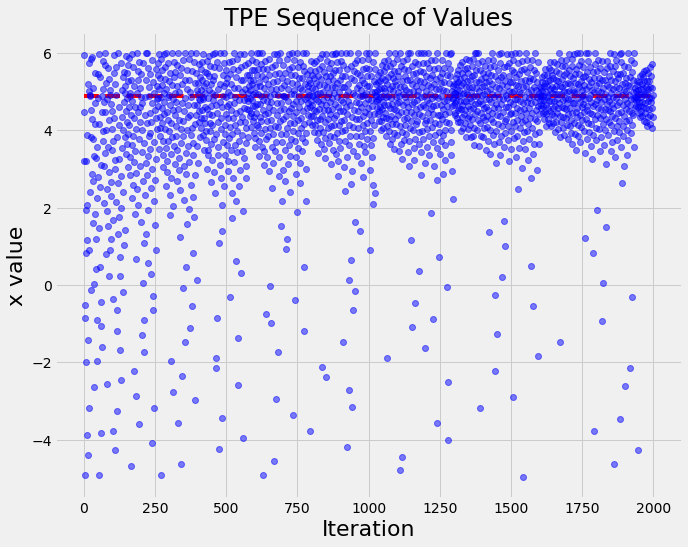

In [15]:
#基于过去的价值观选择下一个价值观的好处:对有前途的价值观进行更多的评估。
#随机的结果,我们应该将TPE结果与随机搜索结果进行对比。在这里，我们不期望看到值随时间变化的任何趋势，因为值是随机选择的。

plt.figure(figsize = (10, 8))
plt.plot(tpe_results['iteration'], tpe_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('TPE Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

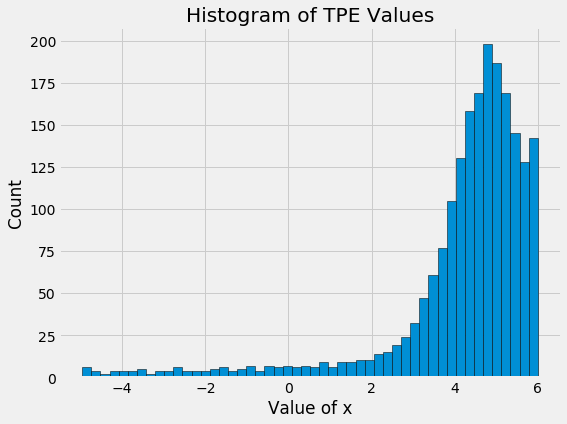

In [16]:
plt.figure(figsize = (8, 6))
plt.hist(tpe_results['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of TPE Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

Best Loss of -219.8012 occured at iteration 655


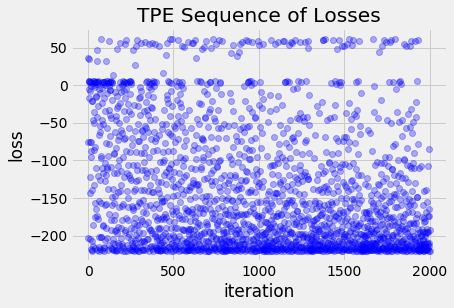

In [17]:
# Sort with best loss first
tpe_results = tpe_results.sort_values('loss', ascending = True).reset_index()

plt.plot(tpe_results['iteration'], tpe_results['loss'], 'bo', alpha = 0.3);
plt.xlabel('iteration'); plt.ylabel('loss'); plt.title('TPE Sequence of Losses');

print('Best Loss of {:.4f} occured at iteration {}'.format(tpe_results['loss'][0], tpe_results['iteration'][0]))

In [18]:
rand_results = pd.DataFrame({'loss': [x['loss'] for x in rand_trials.results], 'iteration': rand_trials.idxs_vals[0]['x'],
                            'x': rand_trials.idxs_vals[1]['x']})
                            
rand_results.head()

,loss,iteration,x
0,36.210073,0,5.957885
1,-202.384052,1,4.470885
2,-75.519449,2,3.218963
3,5.543552,3,-0.515859
4,35.078011,4,-4.916832


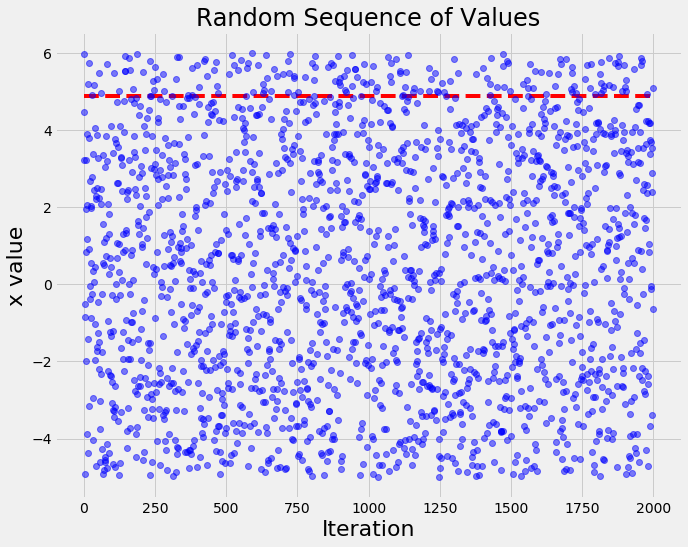

In [19]:
plt.figure(figsize = (10, 8))
plt.plot(rand_results['iteration'], rand_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('Random Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

Best Loss of -219.8012 occured at iteration 235


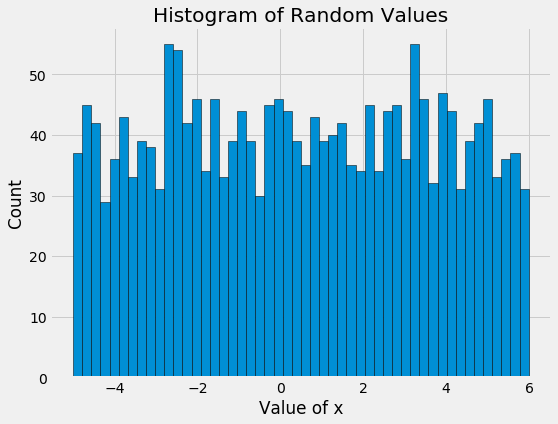

In [20]:
# Sort with best loss first
rand_results = rand_results.sort_values('loss', ascending = True).reset_index()

plt.figure(figsize = (8, 6))
plt.hist(rand_results['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of Random Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

# Print information
print('Best Loss of {:.4f} occured at iteration {}'.format(rand_results['loss'][0], rand_results['iteration'][0]))

In [21]:
# Normally distributed space
space = hp.normal('x', 4.9, 0.5)

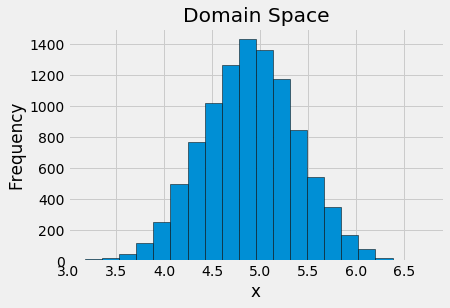

In [22]:
samples = []

# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))
    

# Histogram of the values
plt.hist(samples, bins = 20, edgecolor = 'black'); 
plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space');

In [23]:
from hyperopt import STATUS_OK
from timeit import default_timer as timer
def objective(x):
    """Objective function to minimize with smarter return values"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Evaluate the function
    start = timer()
    loss = f(x) * 0.05
    end = timer()
    
    # Calculate time to evaluate
    time_elapsed = end - start
    
    results = {'loss': loss, 'status': STATUS_OK, 'x': x, 'time': time_elapsed}
    
    # Return dictionary
    return results

In [24]:
# New trials object
trials = Trials()

# Run 2000 evals with the tpe algorithm
best = fmin(fn=objective, space=space, algo=tpe_algo, trials=trials, 
                max_evals=2000, rstate= np.random.RandomState(120))

In [25]:
results = trials.results
results[:2]

[{'loss': -189.3682041842684,
  'status': 'ok',
  'x': 5.312379584994148,
  'time': 5.843470128752415e-05},
 {'loss': -219.325099632915,
  'status': 'ok',
  'x': 4.8166084516702705,
  'time': 4.4057909718731025e-05}]

In [26]:
#将结果转换为dataframe
#这是一个简单的优化问题，所以得到的最低值与均匀分布的值没有什么区别。大约需要相同次数的迭代才能收敛。我们可以比较分布看看是否尝试了更好的值。
# Results into a dataframe
results_df = pd.DataFrame({'time': [x['time'] for x in results], 
                           'loss': [x['loss'] for x in results],
                           'x': [x['x'] for x in results],
                            'iteration': list(range(len(results)))})

# Sort with lowest loss on top
results_df = results_df.sort_values('loss', ascending = True)
results_df.head()

,time,loss,x,iteration
956,0.000037,-219.801204,4.878152,956
1316,0.000034,-219.801204,4.878111,1316
402,0.000047,-219.801204,4.878189,402
914,0.000042,-219.801203,4.878064,914
1954,0.000048,-219.801203,4.878222,1954


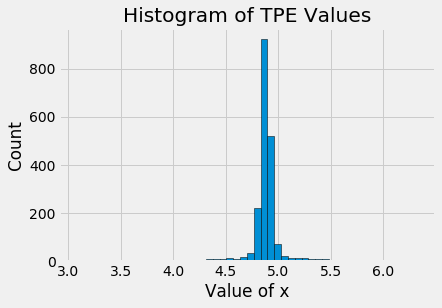

In [27]:
plt.hist(results_df['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of TPE Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

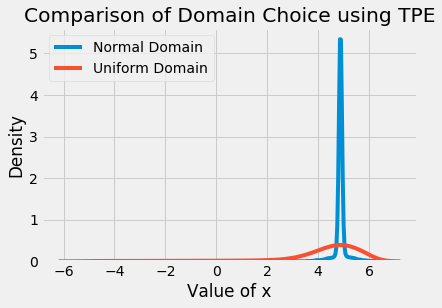

In [28]:
sns.kdeplot(results_df['x'], label = 'Normal Domain')
sns.kdeplot(tpe_results['x'], label = 'Uniform Domain')
plt.legend(); plt.xlabel('Value of x'); plt.ylabel('Density'); plt.title('Comparison of Domain Choice using TPE');

In [29]:
print('Lowest Value of the Objective Function = {:.4f} at x = {:.4f} found in {:.0f} iterations.'.format(results_df['loss'].min(),
                                                                             results_df.loc[results_df['loss'].idxmin()]['x'],
                                                                             results_df.loc[results_df['loss'].idxmin()]['iteration']))

Lowest Value of the Objective Function = -219.8012 at x = 4.8782 found in 956 iterations.


In [30]:
#本文使用Hyperopt实现基于贝叶斯模型的优化的基本实现。这需要四个部分:
#    目标:我们想要最小化的东西
#    域:使目标最小化的参数值
#    超参数优化函数:如何构建代理函数和下一个值
#    由分数、参数对组成的试验
#    随机搜索和基于顺序模型的优化之间的区别很明显:随机搜索是不知情的，因此需要更多的试验来最小化目标函数。
#树Parzen估计器(一种用于SMBO的算法)花费了更多的时间选择下一个值，但是总体上需要对目标函数进行更少的评估，
#因为它能够推断出下一个要评估的值。经过多次迭代，SMBO算法集中在最有前途的值周围进行搜索，结果如下:

# Just because you can do it in one line doesn't mean you should! 
best = fmin(fn = lambda x: np.poly1d([1, -2, -28, 28, 12, -26, 100])(x) * 0.05,
            space = hp.normal('x', 4.9, 0.5), algo=tpe.suggest, 
            max_evals = 2000)

best

{'x': 4.878118251331484}